1. Implemente un perceptrón simple que aprenda la función lógica $AND$ y la función lógica $OR$, de $2$ y de $4$ entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de $2$ dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red

![](img/perceptrón-simple1.png)

$AND$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
|-------|-----|-----|-----|-----|
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $y$   | $0$ | $0$ | $0$ | $1$ |

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(2002)

In [ ]:
def AND(X):
    return all(X)

def OR(X):
    return any(X)

In [ ]:
class PerceptronSimple:
    def __init__(self):
        self.W = np.random.randn(3)
    def train(self, X, Y, alpha, iter_):
        for _ in range(iter_):
            for n in range(len(X)):
                a = self.predict(X[n])
                if a != Y[n]:
                    self.W[0] += alpha * (Y[n] - a) * X[n][0]
                    self.W[1] += alpha * (Y[n] - a) * X[n][1]
                    self.W[2] += alpha * (Y[n] - a) * (-1)
    def predict(self, x):
        h = np.dot(np.append(x, -1), self.W)
        return 0 if h < 0 else 1

In [ ]:
X_train = [[x1,x2] for x1 in [0,1] for x2 in[0,1]]
Y_train = [AND(x) for x in X_train]

perceptron = PerceptronSimple()
perceptron.train(X_train[1:] + [[1,1]], Y_train[1:] + [True], 0.01, 10000)

for x in X_train:
    print(x, perceptron.predict(x))

$AND$ de $4$ entradas:

| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $0$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $y$   | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ |

In [ ]:
class PerceptronSimple:
    def __init__(self):
        self.W = np.random.randn(5)
    def train(self, X, Y, alpha, iter_):
        for _ in range(iter_):
            for n in range(len(X)):
                a = self.predict(X[n])
                if a != Y[n]:
                    self.W[0] += alpha * (Y[n] - a) * X[n][0]
                    self.W[1] += alpha * (Y[n] - a) * X[n][1]
                    self.W[2] += alpha * (Y[n] - a) * X[n][2]
                    self.W[3] += alpha * (Y[n] - a) * X[n][3]
                    self.W[4] += alpha * (Y[n] - a) * (-1)
    def predict(self, x):
        h = np.dot(np.append(x, -1), self.W)
        return 0 if h < 0 else 1

In [ ]:
X_train = [[x1,x2,x3,x4] for x1 in [0,1] for x2 in[0,1] for x3 in [0,1] for x4 in[0,1]]
Y_train = [AND(x) for x in X_train]

perceptron = PerceptronSimple()
perceptron.train(X_train[5:] + [[1,1,1,1] for _ in range(5)], Y_train[5:] + [True for _ in range(5)], 0.001, 10000)

for x in X_train:
    print(x, perceptron.predict(x))

2. Implemente un perceptrón multicapa que aprenda la función lógica $XOR$ de $2$ y de $4$ entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre cómo evoluciona el error durante el entrenamiento.

![](img/perceptrón-multicapa1.png)

$XOR$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
|-------|-----|-----|-----|-----|
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $y$   | $0$ | $1$ | $1$ | $0$ |

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def d_tanh(z):
    return 1 - np.tanh(z)**2

class PerceptronMulticapa:
    def __init__(self, sizes, g=sigmoid, d_g=d_sigmoid):
        self.L = len(sizes)
        self.sizes = sizes
        self.a = [[0 for _ in range(s)] for s in sizes]
        self.z = [[0 for _ in range(s)] for s in sizes[1:]]
        self.w = [np.random.randn(n,m) for n, m in zip(sizes[1:], sizes[:-1])]
        self.b = [np.random.randn(s) for s in sizes[1:]]
        self.g = g
        self.d_g = d_g
    def predict(self, x):
        self.a[0] = x
        for l in range(1, self.L):
            self.z[l-1] = self.w[l-1] @ self.a[l-1] + self.b[l-1]
            self.a[l] = self.g(self.z[l-1])
        return self.a[-1]

    def train(self, X, Y, lr=0.01, iters=1000):
        for _ in range(iters):  # Iterar varias veces
            for x, y in zip(X, Y):
                # predigo x para actualizar la matriz de activaciones
                self.predict(x)
                
                # calculo el error
                grad_C_a = self.a[-1] - y
                delta_l = grad_C_a * self.d_g(self.z[-1])
                
                # inicializo los gradientes
                grad_C_w = [np.zeros_like(w) for w in self.w]
                grad_C_b = [np.zeros_like(b) for b in self.b]
                
                # backprop
                for l in range(self.L-2, -1, -1):
                    grad_C_w[l] = np.outer(delta_l, self.a[l])
                    grad_C_b[l] = delta_l
                    if l > 0:
                        delta_l = (self.w[l].T @ delta_l) * self.d_g(self.z[l-1])
                
                # muevo los parámetros en la dirección contraria al gradiente en módulo learning rate
                self.w = [w - lr * grad_w for w, grad_w in zip(self.w, grad_C_w)]
                self.b = [b - lr * grad_b for b, grad_b in zip(self.b, grad_C_b)]

In [ ]:
X_train = [[x1, x2] for x1 in [0, 1] for x2 in [0, 1]]
Y_train = [x1 ^ x2 for x1, x2 in X_train]

perceptron = PerceptronMulticapa([2,3,1])
perceptron.train(X_train, Y_train, lr=0.1, iters=10000)
for x in X_train:
    print(x, 1 if perceptron.predict(x) > .5 else 0)

$XOR$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
|-------|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $y$   | $0$ | $1$ | $1$ | $0$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $0$ | $1$ | $1$ | $0$ |

In [ ]:
def xor(x):
    return x[0] ^ x[1] ^ x[2] ^ x[3]

X_train = [[x1, x2, x3, x4] for x1 in [0, 1] for x2 in [0, 1] for x3 in [0, 1] for x4 in [0, 1]]
Y_train = [xor(x) for x in X_train]

perceptron = PerceptronMulticapa([4,8,1])
perceptron.train(X_train,Y_train,lr=0.01,iters=100000)
for x in X_train:
    print(x, 1 if perceptron.predict(x) > .5 else 0, xor(x))

4.
    a) Implemente una red con aprendizaje Backpropagation que aprenda la siguiente función:
    $$
    f(x, y, z) = \sin(x) + \cos(y) + z
    $$
    donde $x, y \in [0, 2\pi]$ y $z \in [-1, 1]$.  
    Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre la evolución del error de entrenamiento y de evaluación en función de las épocas de entrenamiento.

    b) Estudie la evolución de los errores durante el entrenamiento de una red con una capa oculta de $30$ neuronas cuando el conjunto de entrenamiento contiene $40$ muestras.  
    ¿Qué ocurre si el minibatch tiene tamaño 40? ¿Y si tiene tamaño 1?

In [ ]:
def f(x, y, z):
    return np.sin(x) + np.cos(y) + z

X_train = [[x, y, z] for x, y, z in zip(np.linspace(0, 2*np.pi, 100), np.linspace(0, 2*np.pi, 100), np.linspace(-1, 1, 100))]
Y_train = np.array([f(x, y, z) for x, y, z in X_train])

In [ ]:
# voy a tener que cambiar la función costo usando el mse
# la arquitectura no debe estar tan mal
# me está errando los negativos porque la sigmoide sólo me da > 0
# voy a usar tangente hiperbólica
# la tanh por lo menos no es > 0 pero está acotada < 1 :(

perceptron = PerceptronMulticapa([3,15,15,15,1], g=tanh, d_g=d_tanh)
perceptron.train(X_train,Y_train,lr=0.01,iters=10000)

# for x, y, z in X_train:
#     print(str(round(x, 2))+"\t"+
#           str(round(y, 2))+"\t"+
#           str(round(z, 2))+"\t"+
#           str(round(perceptron.predict([x, y, z])[0],2))+"\t"+
#           str(round(f(x, y, z),2)))

In [ ]:
def mse(Y_h, Y):
    return sum((Y_h - Y)**2)/len(Y)

Y = np.array([perceptron.predict([x, y, z])[0] for x, y, z in X_train])
mse(Y_train, Y)

In [ ]:
for i in range(len(Y)):
    print(round(Y[i],2), round(Y_train[i],2))

5. Siguiendo el trabajo de Hinton y Salakhutdinov (2006), entrene una máquina restringida
de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de
recontruccion durante el entrenamiento, y ejemplos de cada uno de los dígitos
reconstruidos.

In [ ]:
import numpy as np

def E(v, h, w, bv, bh):
    return -bv @ v -bh @ h - v @ w @ h

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class RBM:
    def __init__(self, v_size, h_size):
        self.v_size = v_size
        self.h_size = h_size
        self.v = np.array([0 for _ in range(v_size)])
        self.h = np.array([np.random.randn() for _ in range(h_size)])
        self.w = np.random.normal(0, 0.01, (v_size, h_size))
        self.bv = np.random.randn(v_size)
        self.bh = np.random.randn(h_size)
    def learn(self, train, epsilon=0.05, n=300):
        # repetir el proceso de aprendizaje no supervisado n veces
        for _ in range(n):
            f_vh_data = np.zeros((self.v_size, self.h_size))  # v_i y h_j activados en los datos
            f_vh_recon = np.zeros((self.v_size, self.h_size))  # v_i y h_j activados en reconstrucciones
            # estadísticas de los sesgos
            data_bv_update = np.zeros(self.v_size)
            recon_bv_update = np.zeros(self.v_size)
            data_bh_update = np.zeros(self.h_size)
            recon_bh_update = np.zeros(self.h_size)
            for t in train:
                # datos originales
                self.v = t
                p_h = sigmoid(self.bh + self.v @ self.w)
                self.h = np.array([1 if np.random.rand() < p else 0 for p in p_h])
                f_vh_data += np.outer(self.v, self.h)
                # confabulaciones
                p_v = sigmoid(self.bv + self.h @ self.w.T)
                recon_v = np.array([1 if np.random.rand() < p else 0 for p in p_v])
                p_h_recon = sigmoid(self.bh + recon_v @ self.w)
                recon_h = np.array([1 if np.random.rand() < p else 0 for p in p_h_recon])
                f_vh_recon += np.outer(recon_v, recon_h)
                data_bv_update += t
                recon_bv_update += recon_v
                data_bh_update += p_h
                recon_bh_update += p_h_recon
            # normalizo las estadísticas
            f_vh_data /= len(train)
            f_vh_recon /= len(train)
            data_bv_update /= len(train)
            recon_bv_update /= len(train)
            data_bh_update /= len(train)
            recon_bh_update /= len(train)
            # acutalizo los pesos y los sesgos
            self.w += epsilon * (f_vh_data - f_vh_recon)
            self.bv += epsilon * (data_bv_update - recon_bv_update)
            self.bh += epsilon * (data_bh_update - recon_bh_update)
    def sample(self, x):
        self.v = x
        p_h = sigmoid(self.bh + self.v @ self.w)
        self.h = np.array([1 if np.random.rand() < p else 0 for p in p_h])
        # p_v = sigmoid(self.bv + self.h @ self.w.T)
        # self.v = np.array([1 if np.random.rand() < p else 0 for p in p_v])
        # ra datos continuos, la actualización es samplear una gaussiana con varianza unitaria y media b_i + sum_j h_j w_ij
        self.v = np.array(np.random.normal(self.bv + self.h @ self.w.T, 1, self.v_size))
        return self.h
    def forward(self, x):
        v = x
        p_h = sigmoid(self.bh + v @ self.w)
        v = (np.random.rand(*p_h.shape) < p_h).astype(np.float32)
        return v
    def backward(self, x):
        v = x
        p_v = sigmoid(self.bv + v @ self.w.T)
        v = (np.random.rand(*p_v.shape) < p_v).astype(np.float32)
        return v

# apilando RBMs
class StackedRBMs():
    def __init__(self, rbms):
        self.rbms = rbms
    def learn(self, train, epsilon=0.05, n=300):
        v = train
        for rbm in self.rbms:
            rbm.learn(v, epsilon, n)
            v = [rbm.sample(t) for t in v]
    def sample(self, x):
        # forward
        v = x
        for rbm in self.rbms:
            v = rbm.forward(v)
        # backward
        for rbm in reversed(self.rbms):
            v = rbm.backward(v)
        return v

from scipy.io import loadmat

# mnist sin labels
train = loadmat("data/rbm/datosTrain.mat")["data"]/255
test = loadmat("data/rbm/datosTest.mat")["data"]/255
# por ahora binarizo los datos
# train = (train > 0.5).astype(np.float32)
# test = (test > 0.5).astype(np.float32)

rbm1 = RBM(784, 392)
rbm2 = RBM(392, 196)
rbm3 = RBM(196, 392)
rbm4 = RBM(392, 784)

# inicializo las rbms apiladas
srbms = StackedRBMs([rbm1, rbm2, rbm3, rbm4])
# aprendiendo
srbms.learn(train, epsilon=0.05, n=500)

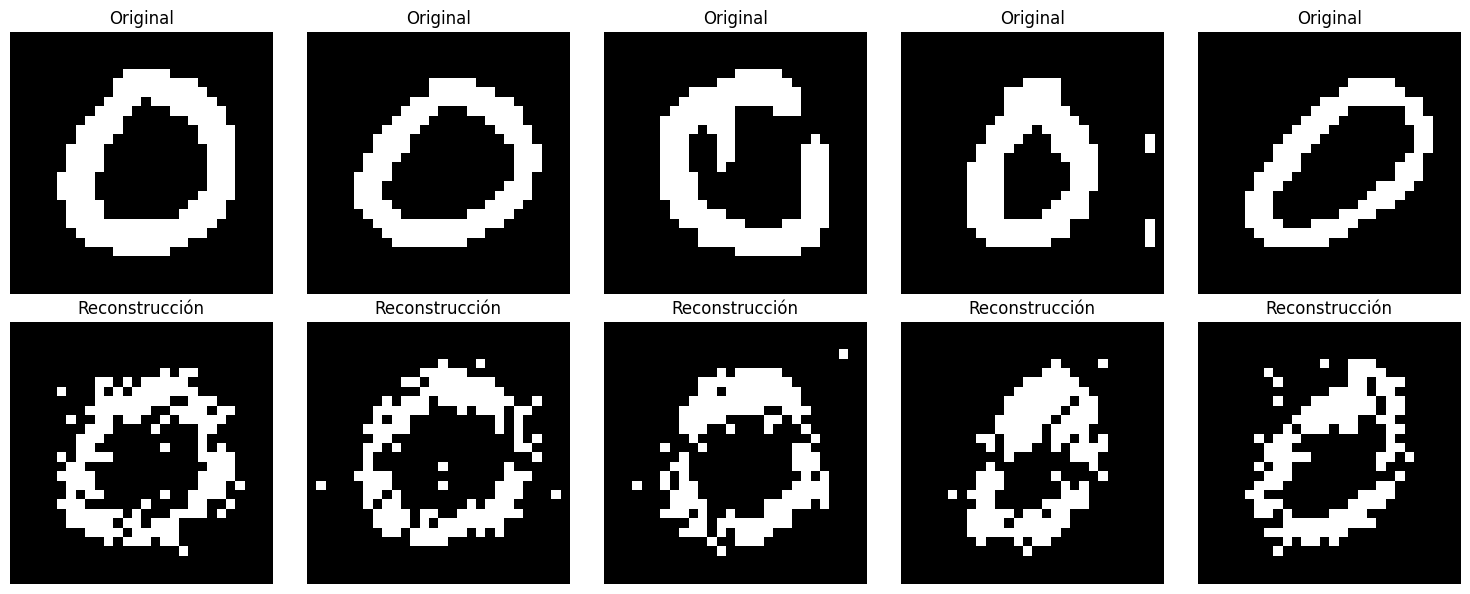

In [137]:
import matplotlib.pyplot as plt

# muestro las imágenes originales y sus reconstrucciones
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    y = test[i]
    s = srbms.sample(y)
    # imagen original
    axes[0, i].imshow(y.reshape(28, 28), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')
    # reconstrucción
    axes[1, i].imshow(s.reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Reconstrucción')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

6. Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST.  
¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos 90% en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más
pequeño que puede conseguir con la misma exactitud?

7. Entrene un autoencoder para obtener una representación de baja dimensionalidad de las
imágenes de MNIST. Use dichas representaciones para entrenar un perceptrón
multicapa como clasificador. ¿Cuál es el tiempo de entrenamiento y la exactitud del
clasificador obtenido cuando parte de la representación del autoencoder, en
comparación con lo obtenido usando las imágenes originales?